In Batch Gradient descent:

1. We go through all training samples and calculate the cumulative error.
2. Now we back propagate and then adjusts the weights.
3. Huge datasets can result in Crazy computations as we go through the entire training samples.

In Stochastic Gradient descent:
1. We select one randomly picked sample and then perform training on them and then accordingly adjust weights every time we do the training. In every step the weights and bias gets updated.
2. Suitable for huge datasets.

In mini batch gradient descent:
1. We select a batch of randomly picked sample for a forward pass and then adjusts the weights accordingly.

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('blr_house_price.csv')
df.sample(5)

,area,bedrooms,price
4,1200,2,51.0
11,2785,4,140.0
6,2732,4,135.0
12,1000,2,38.0
16,1180,3,48.0


In [27]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [28]:
scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))

In [29]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [30]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [31]:
np.ones(shape=2)

array([1., 1.])

Implementing Batch Gradient Descent

In [32]:
def batch_gradient_descent(X, y_true, epochs, lr = 0.01):
    number_of_feature = X.shape[1]
    
    w = np.ones(shape=number_of_feature)
    bias = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, scaled_x.T) + bias
        
        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true - y_pred)
        
        w = w - lr * w_grad
        bias = bias - lr * b_grad
        
        cost = np.mean(np.square(y_true - y_pred))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost, cost_list, epoch_list

batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

(array([0.70712464, 0.67456527]),
 -0.23034857438407427,
 0.0068641890429808105,
 [0.2768777174681,
  0.16573507027671067,
  0.10212908135956808,
  0.06564235879682481,
  0.04463022365578522,
  0.032451224217648705,
  0.025317339083010492,
  0.021067914076635837,
  0.01847041893523527,
  0.016821657535428185,
  0.015720331469182485,
  0.014937329116527903,
  0.014341749105819087,
  0.013858709977424097,
  0.013445288028074865,
  0.013076793952344979,
  0.012738945874049962,
  0.012423405193086517,
  0.012125230310262438,
  0.011841424159334757,
  0.011570105565415722,
  0.011310036391930279,
  0.01106035160957391,
  0.010820405104702651,
  0.010589681505198633,
  0.010367745666240432,
  0.010154213642862602,
  0.009948735925187014,
  0.009750987675343718,
  0.009560662965348804,
  0.009377471304274599,
  0.009201135478234784,
  0.009031390146006544,
  0.008867980872255637,
  0.008710663416728342,
  0.008559203175573597,
  0.008413374715338717,
  0.008272961365501463,
  0.00813775484985

In [33]:
w, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

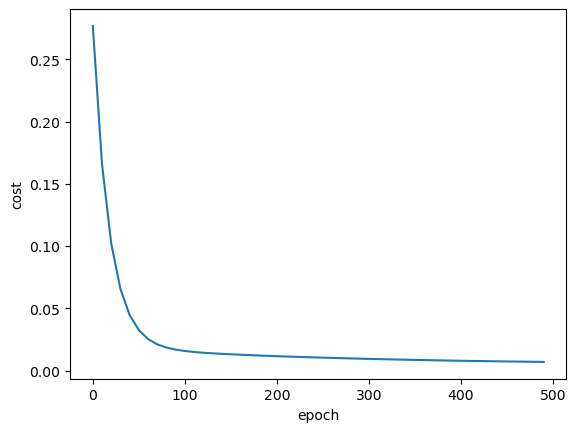

In [34]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

PREDICTION FUNCTION

In [36]:
def predict(area, bedrooms, w, bias):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + bias
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,bias)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [37]:
predict(1000, 2, w, bias)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [64]:
import random
def stochastic_gradient_descent(X, y_true, epochs, lr = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    bias = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w, sample_x.T) + bias
        
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)
        
        w = w - lr * w_grad
        bias = bias - lr * b_grad
        
        cost = np.square(sample_y - y_pred)
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost, cost_list, epoch_list

In [65]:
w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

In [66]:
w_sgd, bias_sgd, cost_sgd

(array([0.7068131 , 0.67678688]), -0.23379274799568753, 0.0022394595307383323)

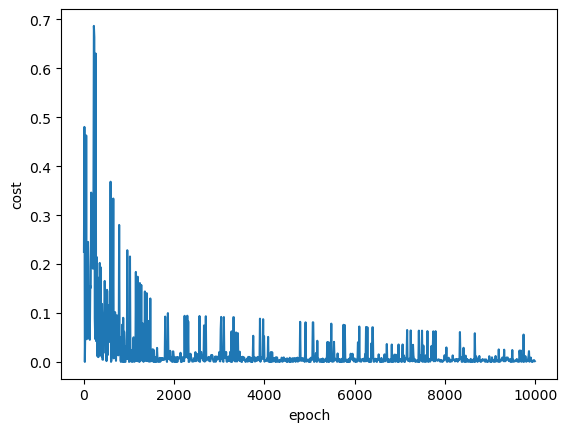

In [67]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [68]:
def predict(area, bedrooms, w_sgd, bias_sgd):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = w_sgd[0] * scaled_x[0] + w_sgd[1] * scaled_x[1] + bias_sgd
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w_sgd,bias_sgd)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.1887138261437

In [69]:
predict(1440,3,w_sgd,bias_sgd)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


67.17924926605099

In [70]:
predict(1540,3,w_sgd,bias_sgd)

/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70.46958610383174

In [71]:
np.random.permutation(20)

array([19,  4,  6,  9, 16,  2,  0, 15, 14,  3, 12,  1,  7, 18, 17,  5,  8,
       11, 13, 10])

In [82]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + bias
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%2==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, bias, cost, cost_list, epoch_list

w, bias, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],))
w, bias, cost

(array([1.00464888, 1.26108178]), -0.7708507068426951, 0.11456706685756286)

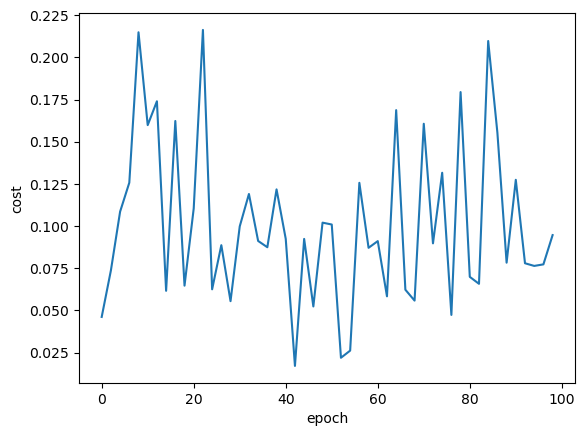

In [83]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

TENSORBOARD

In [84]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.0


In [85]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [86]:
len(X_train)

60000

In [87]:
len(X_test)

10000

In [88]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [89]:
X_train[0].shape

(28, 28)

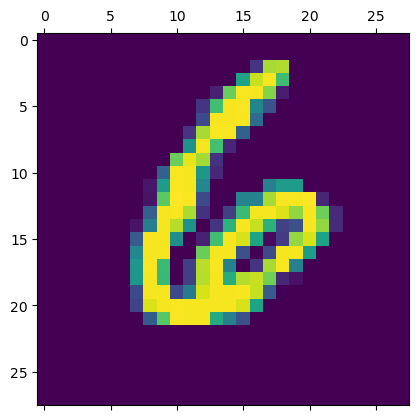

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(X_train[13])

In [91]:
X_train = X_train/255
X_test = X_test/255

In [92]:
#A bit simple alternative when we can skip the flatten operation
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 10)

Metal device set to: Apple M1


2022-12-06 12:22:23.487045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 12:22:23.488058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-12-06 12:22:23.907017: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 12:22:24.055453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2039 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0837 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0270 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0163 - accur

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
   1/1875 [..............................] - ETA: 8:32 - loss: 2.2726 - accuracy: 0.1562

2022-12-06 12:23:59.552370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5818 - accuracy: 0.8494
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2292 - accuracy: 0.9349
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1944 - accuracy: 0.9447
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1685 - accuracy: 0.9520
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1487 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1328 - accuracy: 0.9622
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1198 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1090 - accuracy: 0.9692
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0996 - accurac

In [94]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5, callbacks=[tb_callback])

Epoch 1/5
  23/1875 [..............................] - ETA: 8s - loss: 1.5350 - accuracy: 0.6005

2022-12-06 12:27:18.960487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.2051 - accuracy: 0.9388
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0827 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0565 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0443 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0352 - accuracy: 0.9888


In [99]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5, callbacks=[tb_callback])

Epoch 1/5
  24/1875 [..............................] - ETA: 8s - loss: 2.2283 - accuracy: 0.1589

2022-12-06 12:39:31.460611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5651 - accuracy: 0.8529
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2720 - accuracy: 0.9218
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2197 - accuracy: 0.9365
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1865 - accuracy: 0.9465
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1619 - accuracy: 0.9534


In [100]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 19915), started 0:06:15 ago. (Use '!kill 19915' to kill it.)